hi Guys check out my new project>>>>

Check out this my classification project using the sonar Dataset


The project aims to predict whether an object detected by sonar data is a rock or a mine using machine learning, employing Vatious classification algorithm. Sonar data is a powerful tool for underwater object detection, and this project leverages it to build a binary classification model. The Logistic Regression model is trained on a dataset containing features extracted from sonar signals, and its performance is evaluated based on accuracy metrics. The ultimate goal is to provide a reliable system for distinguishing between rocks and mines in sonar data, with potential applications in underwater navigation and security.
Various steps taken invlve:
1. Data cleaning
2. Data preprocessing
3. Model training and Evaluation

importing dependencies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Data Collection and preprocessing

In [2]:
#loading the dataset to a dataframe
df = pd.read_csv(r'C:\Users\USER\Documents\Data Science project\solarData\sonar data.csv',header = None)

In [3]:
#having a glimpse on what the data looks like
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#number of rows and column
df.shape

(208, 61)

In [5]:
#checking out for missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

1. this data consist of 61 features and 208 enteries
2. it does not have any misssing value

In [6]:
#checking out for duplicated
df.duplicated().sum()

0

The Dataset has no duplicated Value

In [7]:
#Checking out Datatype
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

the data set is made up of datatype float64 except for the Target column which is an object
1. we will have to later convert the Target column to numeric so that how model can easily learn from it

In [8]:
#describing the statistical measures of the data
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [9]:
#checking the distribution of Target column

df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [10]:
#grouping the mean of each features by the Target variable
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [11]:
#seperating data and labels
x = df.drop(columns = 60, axis = 1)
y = df[60]

In [12]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [13]:
#label encoding----> converting the target variables into numerics

y = y.replace({"M": 0, "R": 1})

In [14]:
# spliting the data into training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, stratify = y, random_state = 1)

In [15]:
#converting the data into arrays so that all our model can easily process it

x_train = x_train.values
y_test = y_test.values
x_test = x_test.values
y_train = y_train.values

In [16]:
print(x.shape, x_train.shape, x_test.shape)

(208, 60) (187, 60) (21, 60)


Training and Evaluation of different machine learning Model


KNN


testing various K values for our Knn to know the one that will give us the most accurate result

In [35]:
k_range =[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
training_accuracies = list()
testing_accuracies = list()
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_data_prediction = knn.predict(x_train)
    train_data_accuracy = accuracy_score(train_data_prediction, y_train)
    training_accuracies.append(train_data_accuracy)
    
    test_data_prediction = knn.predict(x_test)
    test_data_accuracy = accuracy_score(test_data_prediction, y_test)
    testing_accuracies.append(test_data_accuracy)
    
    
    





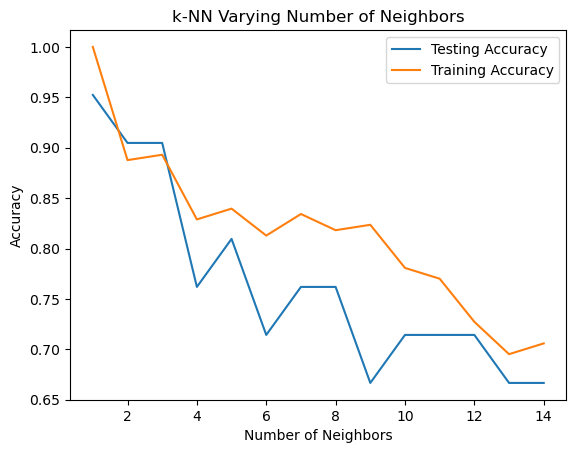

In [22]:
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN Varying Number of Neighbors')
plt.legend()
plt.show()

Train the kNN model with the optimal number of neighbors and make predictions

In [45]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
#makes prediction withe the training data
predict_train_data_knn =knn.predict(x_train)
#makes a prediction with the testing data
predict_test_data_knn = knn.predict(x_test)

Logistic Regresion

In [46]:
model = LogisticRegression()

In [47]:
#trainig the logistic regression with training data
model.fit(x_train, y_train)
#makes prediction withe the training data
x_train_prediction_log = model.predict(x_train)
#makes a prediction with the testing data
x_test_prediction_log = model.predict(x_test)

PCA + Logistic Regression

In [55]:
# Initialize PCA and reduce the number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train Logistic Regression model on PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(x_train_pca, y_train)

#makes prediction with the training data
x_train_prediction_pca = model_pca.predict(x_train_pca)
#makes a prediction with the testing data
x_test_prediction_pca = model_pca.predict(x_test_pca)


Model Evaluation

using accurcy_score
and cofusion matrix



KNN

In [48]:
training_data_accuracy_KNN = accuracy_score(predict_train_data_knn, y_train)
testing_data_accuracy_KNN = accuracy_score(predict_test_data_knn,y_test)
print("Accuracy on training data for KNN :", training_data_accuracy_KNN)
print("Accuracy on testing data for KNN :", testing_data_accuracy_KNN)

Accuracy on training data for KNN : 0.8877005347593583
Accuracy on testing data for KNN : 0.9047619047619048


Confusion matrix for the KNN model is : [[11  0]
 [ 2  8]]


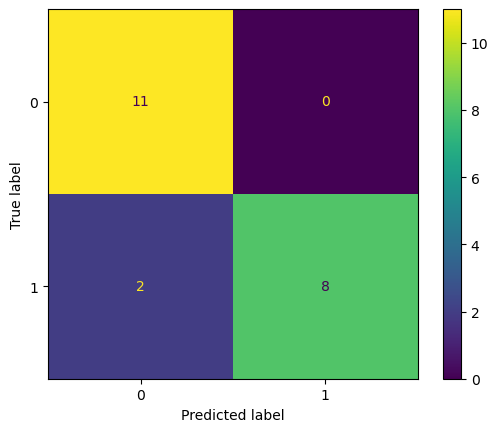

In [52]:
### building cofusion matrix
cm = confusion_matrix(y_test, predict_test_data_knn)
print("Confusion matrix for the KNN model is :",cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic Regresion

In [53]:
#Evaluation
training_data_accuracy_log = accuracy_score(x_train_prediction_log, y_train)
testing_data_accuracy_log = accuracy_score(x_test_prediction_log,y_test)
print("Accuracy on training data for Log :", training_data_accuracy_log)
print("Accuracy on testing data for Log :", testing_data_accuracy_log)

Accuracy on training data for Log : 0.8342245989304813
Accuracy on testing data for Log : 0.7619047619047619


Confusion matrix for the Log model is : [[9 2]
 [3 7]]


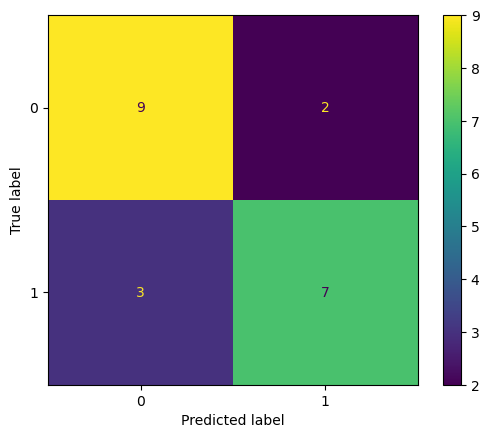

In [54]:
### building cofusion matrix
cm = confusion_matrix(y_test, x_test_prediction_log)
print("Confusion matrix for the Log model is :",cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
PCA + LOG

In [56]:
#Evaluation
training_data_accuracy_PCA = accuracy_score(x_train_prediction_pca, y_train)
testing_data_accuracy_PCA = accuracy_score(x_test_prediction_pca,y_test)
print("Accuracy on training data for PCA + Log :",training_data_accuracy_PCA )
print("Accuracy on testing data for PCA + Log :", testing_data_accuracy_PCA)

Accuracy on training data for PCA + Log : 0.786096256684492
Accuracy on testing data for PCA + Log : 0.6190476190476191


Confusion matrix for the Log model is : [[7 4]
 [4 6]]


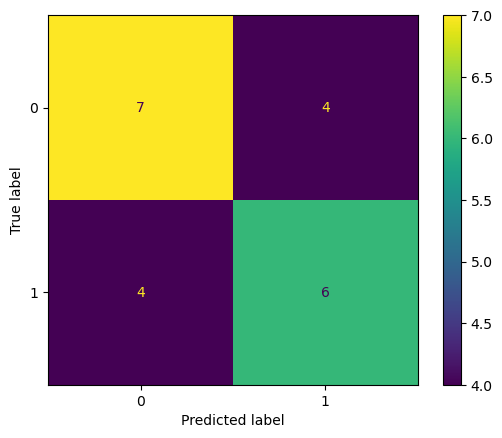

In [59]:
### building cofusion matrix
cm = confusion_matrix(y_test, x_test_prediction_pca)
print("Confusion matrix for the Log model is :",cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()